In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from keras import optimizers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import warnings
import tensorflow as tf

import h5py

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
project_path = '/content/drive/My Drive/AI-ML_Data/'
dataset_file = project_path + 'SVHN_single_grey.h5'

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/AI-ML_Data/SVHN_single_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

# Close this file
h5f.close()

In [0]:
# Flatten the data structure
X_train_knn = X_train.reshape(42000,1024)
X_test_knn = X_test.reshape(18000,1024)

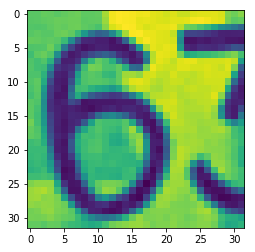

('Label: ', 6)


In [0]:
plt.imshow(X_train[1])    # show first number in the dataset
plt.show()
print('Label: ', y_train1[1])

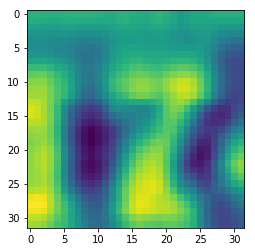

('Label: ', 7)


In [0]:
plt.imshow(X_test[1])    # show first number in the dataset
plt.show()
print('Label: ', y_test1[1])

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# creating odd list of K for KNN
myList = list(range(1,20))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train1)
    # predict the response
    y_pred = knn.predict(X_test_knn)
    # evaluate accuracy
    scores = accuracy_score(y_test1, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


In [0]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = optimal_k)
# fitting the model
knn.fit(X_train_knn, y_train1)
# predict the response
y_pred = knn.predict(X_test_knn)
# evaluate accuracy
print(accuracy_score(y_test1, y_pred))
# instantiate learning model (k = 5)

0.5287222222222222


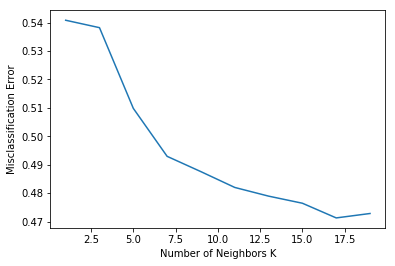

In [0]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [0]:
X_train.shape

X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

W1229 16:09:49.906528 140093584975744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:12: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



ValueError: ignored

In [0]:
y_train1.shape

(42000,)

In [0]:
X_test.shape

(18000, 32, 32)

In [0]:
y_test1.shape

(18000,)

In [0]:
X_train.shape

(42000, 32, 32)

In [0]:
model = Sequential()

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
trainY = tf.keras.utils.to_categorical(y_train1, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test1, num_classes=10)

In [0]:
tf.keras.backend.clear_session ()
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(200, activation='softmax'))

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                1

In [0]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=150,
          batch_size=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/150
42000/42000 [==============================] - 61s 1ms/sample - loss: 2.3062 - acc: 0.1011 - val_loss: 2.3062 - val_acc: 0.1007
Epoch 2/150
42000/42000 [==============================] - 62s 1ms/sample - loss: 2.3062 - acc: 0.1013 - val_loss: 2.3034 - val_acc: 0.1007
Epoch 3/150
42000/42000 [==============================] - 61s 1ms/sample - loss: 2.3062 - acc: 0.0961 - val_loss: 2.3072 - val_acc: 0.0948
Epoch 4/150
42000/42000 [==============================] - 60s 1ms/sample - loss: 2.3057 - acc: 0.1023 - val_loss: 2.3040 - val_acc: 0.1002
Epoch 5/150
42000/42000 [==============================] - 59s 1ms/sample - loss: 2.3064 - acc: 0.1004 - val_loss: 2.3040 - val_acc: 0.0988
Epoch 6/150
42000/42000 [==============================] - 58s 1ms/sample - loss: 2.3061 - acc: 0.1002 - val_loss: 2.3054 - val_acc: 0.1002
Epoch 7/150
42000/42000 [==============================] - 57s 1ms/sample - loss: 2.3061 - acc: 0.1015 - val_l

In [0]:
# KNN Accuracy is 52.8%. Whereas training and test accuracy in Neural networks is much higher (as genereated above). It is tested with 150 Epochs or iterations 
# and the validation accuracy improves substantially.
# 3 RELU activation functions followed by Batch Normalization is employed. Subsequentally, softmax function in output layer is used in addition with SGD optimizer.